In [1]:
from problem import *
from optimizer import *

def main():
    p, alg = readPlanAndCreate()  # Setup and create (problem, algorithm)
    conductExperiment(p, alg)     # Conduct experiment & produce results
    p.describe()                  # Describe the problem solved
    alg.displayNumExp()           # Total number of experiments
    alg.displaySetting()          # Show the algorithm settings
    p.report()                    # Report result

def readPlanAndCreate():
    parameters = readValidPlan()  # Read and store in 'parameters'
    p = createProblem(parameters)
    alg = createOptimizer(parameters)
    return p, alg

def readValidPlan():  # Gradient Descent cannot solve TSP
    while True:
        parameters = readPlan()
        if parameters['pType'] == 2 and parameters['aType'] == 4:
            print("You cannot choose Gradient Descent")
            print("       unless your want a numerical optimization.")
        else:
            break
    return parameters

def readPlan():
    fileName = input("Enter the file name of experimental setting: ")
    infile = open(fileName, 'r')
    parameters = { 'pType':0, 'pFileName':'', 'aType':0, 'delta':0,
                   'limitStuck':0, 'alpha':0, 'dx':0, 'numRestart':0,
                   'limitEval':0, 'numExp':0 }
    parNames = list(parameters.keys())
    for i in range(len(parNames)):
        line = lineAfterComments(infile)
        if parNames[i] == 'pFileName':
            parameters[parNames[i]] = line.rstrip().split(':')[-1][1:]
        else:
            parameters[parNames[i]] = eval(line.rstrip().split(':')[-1][1:])
    infile.close()
    return parameters             # Return a dictionary of parameters

def lineAfterComments(infile):    # Ignore lines beginning with '#'
    line = infile.readline()      # and then return the first line
    while line[0] == '#':         # with no '#'
        line = infile.readline()
    return line

def createProblem(parameters): ###
    # Create a problem instance (a class object) 'p' of the type as 
    # specified by 'pType', set the class variables, and return 'p'.
    pType = parameters['pType']
    if(pType == 1):
        p = Numeric()
    else:
        p = Tsp()
    p.setVariables(parameters)
    return p

def createOptimizer(parameters): ###
    # Create an optimizer instance (a class object) 'alg' of the type  
    # as specified by 'aType', set the class variables, and return 'alg'.
    optimizers = {1:'SteepestAscent()', 2: 'FirstChoice()', 3: 'Stochastic()', 4: 'GradientDescent()', 5 : 'SimulatedAnnealing()'}
    aType = parameters['aType']
    alg = eval(optimizers[aType])
    alg.setVariables(parameters)
    return alg

def conductExperiment(p, alg):
    aType = alg.getAType()
    if 1 <= aType <= 4:
        alg.randomRestart(p)
    else:
        alg.run(p)
    bestSolution = p.getSolution()
    bestMinimum = p.getValue()    # First result is current best
    numEval = p.getNumEval()
    sumOfMinimum = bestMinimum    # Prepare for averaging
    sumOfNumEval = numEval        # Prepare for averaging
    sumOfWhen = 0                 # When the best solution is found
    if 5 <= aType <= 6:
        sumOfWhen = alg.getWhenBestFound()
    numExp = alg.getNumExp()
    for i in range(1, numExp):
        if 1 <= aType <= 4:
            alg.randomRestart(p)
        else:
            alg.run(p)
        newSolution = p.getSolution()
        newMinimum = p.getValue()  # New result
        numEval = p.getNumEval()
        sumOfMinimum += newMinimum
        sumOfNumEval += numEval
        if 5 <= aType <= 6:
            sumOfWhen += alg.getWhenBestFound()
        if newMinimum < bestMinimum:
            bestSolution = newSolution  # Update the best-so-far
            bestMinimum = newMinimum
    avgMinimum = sumOfMinimum / numExp
    avgNumEval = round(sumOfNumEval / numExp)
    avgWhen = round(sumOfWhen / numExp)
    results = (bestSolution, bestMinimum, avgMinimum,
               avgNumEval, sumOfNumEval, avgWhen)
    p.storeExpResult(results)

In [4]:
main() # Stochastic(n), Ackley.txt


Objective function:
20 + math.e - 20 * math.exp(-(1/5) * math.sqrt((1/5) * (x1 ** 2 + x2 ** 2 + x3 ** 2 + x4 ** 2 + x5 ** 2))) - math.exp((1/5) * (math.cos(2 * math.pi * x1) + math.cos(2 * math.pi * x2) +math.cos(2 * math.pi * x3) +math.cos(2 * math.pi * x4) +math.cos(2 * math.pi * x5)))

Search space:
 x1: (-30.0, 30.0)
 x2: (-30.0, 30.0)
 x3: (-30.0, 30.0)
 x4: (-30.0, 30.0)
 x5: (-30.0, 30.0)

Number of experiments: 5

Search algorithm: Stochastic

Number of random restarts: 10

Mutation step size: 0.01
Max evaluations with no improvement: 100 iterations

Average objective value: 18.920
Average number of evaluations: 15,689

Best solution found:
 (6.993, -6.996, -3.002, -1.995, -20.995)
Best value: 17.554

Total number of evaluations: 78,445


In [5]:
main() # Stochastic(n), Convex.txt


Objective function:
(x1 - 2) ** 2 +5 * (x2 - 5) ** 2 + 8 * (x3 + 8) ** 2 + 3 * (x4 + 1) ** 2 + 6 * (x5 - 7) ** 2

Search space:
 x1: (-30.0, 30.0)
 x2: (-30.0, 30.0)
 x3: (-30.0, 30.0)
 x4: (-30.0, 30.0)
 x5: (-30.0, 30.0)

Number of experiments: 5

Search algorithm: Stochastic

Number of random restarts: 10

Mutation step size: 0.01
Max evaluations with no improvement: 100 iterations

Average objective value: 0.000
Average number of evaluations: 609,567

Best solution found:
 (1.995, 5.002, -7.999, -1.002, 7.001)
Best value: 0.000

Total number of evaluations: 3,047,835


In [6]:
main() # Stochastic(n), Griewank.txt


Objective function:
1 + (x1 ** 2 + x2 ** 2 + x3 ** 2+ x4 ** 2 + x5 ** 2) / 4000 - math.cos(x1) * math.cos(x2 / math.sqrt(2)) * math.cos(x3 / math.sqrt(3)) * math.cos(x4 / math.sqrt(4)) * math.cos(x5 / math.sqrt(5))

Search space:
 x1: (-30.0, 30.0)
 x2: (-30.0, 30.0)
 x3: (-30.0, 30.0)
 x4: (-30.0, 30.0)
 x5: (-30.0, 30.0)

Number of experiments: 5

Search algorithm: Stochastic

Number of random restarts: 10

Mutation step size: 0.01
Max evaluations with no improvement: 100 iterations

Average objective value: 0.433
Average number of evaluations: 63,873

Best solution found:
 (-21.983, -13.314, 0.002, -0.002, 14.017)
Best value: 0.214

Total number of evaluations: 319,365


In [7]:
main() # Simulated Annealing(n), Ackley.txt


Objective function:
20 + math.e - 20 * math.exp(-(1/5) * math.sqrt((1/5) * (x1 ** 2 + x2 ** 2 + x3 ** 2 + x4 ** 2 + x5 ** 2))) - math.exp((1/5) * (math.cos(2 * math.pi * x1) + math.cos(2 * math.pi * x2) +math.cos(2 * math.pi * x3) +math.cos(2 * math.pi * x4) +math.cos(2 * math.pi * x5)))

Search space:
 x1: (-30.0, 30.0)
 x2: (-30.0, 30.0)
 x3: (-30.0, 30.0)
 x4: (-30.0, 30.0)
 x5: (-30.0, 30.0)

Mutation step size: 0.01

Number of experiments: 5

Search algorithm: Simulated Annealing

Number of evaluations until termination: 50,000
Average of When the best solution is found: 50,000

Average objective value: 19.369
Average number of evaluations: 150,063

Best solution found:
 (-21.997, -8.996, -12.0, -5.004, 17.992)
Best value: 18.910

Total number of evaluations: 750,315


In [8]:
main() # Simulated Annealing(n), Convex.txt


Objective function:
(x1 - 2) ** 2 +5 * (x2 - 5) ** 2 + 8 * (x3 + 8) ** 2 + 3 * (x4 + 1) ** 2 + 6 * (x5 - 7) ** 2

Search space:
 x1: (-30.0, 30.0)
 x2: (-30.0, 30.0)
 x3: (-30.0, 30.0)
 x4: (-30.0, 30.0)
 x5: (-30.0, 30.0)

Mutation step size: 0.01

Number of experiments: 5

Search algorithm: Simulated Annealing

Number of evaluations until termination: 50,000
Average of When the best solution is found: 50,000

Average objective value: 0.047
Average number of evaluations: 150,063

Best solution found:
 (1.909, 5.01, -7.99, -0.951, 7.021)
Best value: 0.019

Total number of evaluations: 750,315


In [9]:
main() # Simulated Annealing(n), Griewank.txt


Objective function:
1 + (x1 ** 2 + x2 ** 2 + x3 ** 2+ x4 ** 2 + x5 ** 2) / 4000 - math.cos(x1) * math.cos(x2 / math.sqrt(2)) * math.cos(x3 / math.sqrt(3)) * math.cos(x4 / math.sqrt(4)) * math.cos(x5 / math.sqrt(5))

Search space:
 x1: (-30.0, 30.0)
 x2: (-30.0, 30.0)
 x3: (-30.0, 30.0)
 x4: (-30.0, 30.0)
 x5: (-30.0, 30.0)

Mutation step size: 0.01

Number of experiments: 5

Search algorithm: Simulated Annealing

Number of evaluations until termination: 50,000
Average of When the best solution is found: 50,000

Average objective value: 0.569
Average number of evaluations: 150,063

Best solution found:
 (9.424, 13.309, 0.002, 6.267, 7.013)
Best value: 0.089

Total number of evaluations: 750,315


In [10]:
main() # Stochastic(tsp), tsp30.txt


Number of cities: 30
City locations:
     (8, 31)    (54, 97)    (50, 50)    (65, 16)    (70, 47)
   (25, 100)    (55, 74)    (77, 87)     (6, 46)    (70, 78)
    (13, 38)   (100, 32)    (26, 35)    (55, 16)    (26, 77)
    (17, 67)    (40, 36)    (38, 27)     (33, 2)     (48, 9)
    (62, 20)    (17, 92)     (30, 2)    (80, 75)    (32, 36)
    (43, 79)    (57, 49)    (18, 24)    (96, 76)    (81, 39)

Number of experiments: 5

Search algorithm: Stochastic

Number of random restarts: 10

Max evaluations with no improvement: 100 iterations

Average objective value: 472.518
Average number of evaluations: 59,387

Best solution found:
   11   29   28   23    9    7    6   25    1    5
   21   14   15    8   10    0   27   12   24    2
   26    4   16   17   20    3   13   19   18   22
 None
Best value: 457.593

Total number of evaluations: 296,933


In [11]:
main() # Stochastic(tsp), tsp50.txt


Number of cities: 50
City locations:
    (96, 22)    (56, 12)    (19, 24)    (83, 58)     (62, 5)
    (79, 31)      (1, 0)    (29, 71)    (17, 89)    (43, 66)
    (82, 74)    (52, 35)    (84, 92)    (93, 45)    (41, 24)
    (36, 83)    (82, 35)    (89, 71)    (93, 89)    (67, 10)
    (71, 82)    (68, 50)    (84, 81)    (74, 94)    (53, 13)
    (81, 31)    (17, 92)    (99, 82)    (25, 63)      (0, 2)
    (21, 83)    (70, 64)     (79, 6)    (31, 53)    (90, 50)
    (48, 14)    (41, 26)    (80, 56)    (49, 51)    (19, 38)
      (2, 0)    (29, 63)    (18, 59)    (10, 44)     (49, 7)
     (37, 9)    (19, 14)    (90, 85)    (100, 5)    (34, 55)

Number of experiments: 5

Search algorithm: Stochastic

Number of random restarts: 10

Max evaluations with no improvement: 100 iterations

Average objective value: 739.142
Average number of evaluations: 134,245

Best solution found:
   27   20   23   12   22   47   18   10   17    3
   34   13   16   21   37   31   11   36   14   24
    1   25    5

In [12]:
main() # Stochastic(tsp), tsp100.txt


Number of cities: 100
City locations:
    (94, 71)    (75, 60)    (30, 87)    (98, 37)    (66, 39)
     (80, 4)    (28, 75)    (45, 63)     (28, 1)    (21, 25)
    (66, 95)    (63, 60)    (66, 82)    (50, 97)    (95, 29)
    (23, 97)    (32, 35)     (3, 26)    (85, 67)    (20, 36)
    (29, 61)    (86, 31)     (13, 9)     (39, 3)    (77, 41)
    (54, 76)    (80, 46)    (20, 63)    (39, 89)    (51, 49)
    (83, 38)    (34, 72)     (6, 66)    (52, 41)    (99, 64)
     (3, 64)     (6, 72)     (70, 9)    (25, 57)    (32, 33)
    (48, 68)    (73, 99)    (32, 75)     (29, 5)    (74, 30)
    (32, 80)     (96, 7)     (37, 7)     (7, 70)     (0, 94)
    (33, 10)    (84, 61)    (18, 29)    (71, 81)    (82, 76)
    (68, 74)    (56, 53)    (80, 41)    (21, 52)    (12, 64)
    (47, 46)    (55, 20)    (40, 90)    (81, 75)    (83, 23)
    (35, 10)    (18, 84)    (46, 82)    (47, 74)    (25, 28)
    (69, 76)    (77, 28)     (57, 0)    (24, 83)     (5, 65)
    (83, 29)    (94, 93)     (0, 76)    (70, 3

In [13]:
main() # Simulated Annealing(tsp), tsp30.txt


Number of cities: 30
City locations:
     (8, 31)    (54, 97)    (50, 50)    (65, 16)    (70, 47)
   (25, 100)    (55, 74)    (77, 87)     (6, 46)    (70, 78)
    (13, 38)   (100, 32)    (26, 35)    (55, 16)    (26, 77)
    (17, 67)    (40, 36)    (38, 27)     (33, 2)     (48, 9)
    (62, 20)    (17, 92)     (30, 2)    (80, 75)    (32, 36)
    (43, 79)    (57, 49)    (18, 24)    (96, 76)    (81, 39)

Mutation step size: 0.01

Number of experiments: 5

Search algorithm: Simulated Annealing

Number of evaluations until termination: 50,000
Average of When the best solution is found: 50,000

Average objective value: 411.904
Average number of evaluations: 150,063

Best solution found:
   28   23    7    9    6   25    1    5   21   14
   15    8   10    0   27   12   24   17   16    2
   26    4   29   11    3   20   13   19   18   22
 None
Best value: 407.979

Total number of evaluations: 750,315


In [14]:
main() # Simulated Annealing(tsp), tsp50.txt


Number of cities: 50
City locations:
    (96, 22)    (56, 12)    (19, 24)    (83, 58)     (62, 5)
    (79, 31)      (1, 0)    (29, 71)    (17, 89)    (43, 66)
    (82, 74)    (52, 35)    (84, 92)    (93, 45)    (41, 24)
    (36, 83)    (82, 35)    (89, 71)    (93, 89)    (67, 10)
    (71, 82)    (68, 50)    (84, 81)    (74, 94)    (53, 13)
    (81, 31)    (17, 92)    (99, 82)    (25, 63)      (0, 2)
    (21, 83)    (70, 64)     (79, 6)    (31, 53)    (90, 50)
    (48, 14)    (41, 26)    (80, 56)    (49, 51)    (19, 38)
      (2, 0)    (29, 63)    (18, 59)    (10, 44)     (49, 7)
     (37, 9)    (19, 14)    (90, 85)    (100, 5)    (34, 55)

Mutation step size: 0.01

Number of experiments: 5

Search algorithm: Simulated Annealing

Number of evaluations until termination: 50,000
Average of When the best solution is found: 50,000

Average objective value: 524.928
Average number of evaluations: 150,063

Best solution found:
   29    6   40   46    2   39   43   42   28   33
   49   41    7

In [31]:
main() # Simulated Annealing(tsp), tsp100.txt


Number of cities: 100
City locations:
    (94, 71)    (75, 60)    (30, 87)    (98, 37)    (66, 39)
     (80, 4)    (28, 75)    (45, 63)     (28, 1)    (21, 25)
    (66, 95)    (63, 60)    (66, 82)    (50, 97)    (95, 29)
    (23, 97)    (32, 35)     (3, 26)    (85, 67)    (20, 36)
    (29, 61)    (86, 31)     (13, 9)     (39, 3)    (77, 41)
    (54, 76)    (80, 46)    (20, 63)    (39, 89)    (51, 49)
    (83, 38)    (34, 72)     (6, 66)    (52, 41)    (99, 64)
     (3, 64)     (6, 72)     (70, 9)    (25, 57)    (32, 33)
    (48, 68)    (73, 99)    (32, 75)     (29, 5)    (74, 30)
    (32, 80)     (96, 7)     (37, 7)     (7, 70)     (0, 94)
    (33, 10)    (84, 61)    (18, 29)    (71, 81)    (82, 76)
    (68, 74)    (56, 53)    (80, 41)    (21, 52)    (12, 64)
    (47, 46)    (55, 20)    (40, 90)    (81, 75)    (83, 23)
    (35, 10)    (18, 84)    (46, 82)    (47, 74)    (25, 28)
    (69, 76)    (77, 28)     (57, 0)    (24, 83)     (5, 65)
    (83, 29)    (94, 93)     (0, 76)    (70, 3

In [32]:
main() # First-Choice(tsp), tsp100.txt


Number of cities: 100
City locations:
    (94, 71)    (75, 60)    (30, 87)    (98, 37)    (66, 39)
     (80, 4)    (28, 75)    (45, 63)     (28, 1)    (21, 25)
    (66, 95)    (63, 60)    (66, 82)    (50, 97)    (95, 29)
    (23, 97)    (32, 35)     (3, 26)    (85, 67)    (20, 36)
    (29, 61)    (86, 31)     (13, 9)     (39, 3)    (77, 41)
    (54, 76)    (80, 46)    (20, 63)    (39, 89)    (51, 49)
    (83, 38)    (34, 72)     (6, 66)    (52, 41)    (99, 64)
     (3, 64)     (6, 72)     (70, 9)    (25, 57)    (32, 33)
    (48, 68)    (73, 99)    (32, 75)     (29, 5)    (74, 30)
    (32, 80)     (96, 7)     (37, 7)     (7, 70)     (0, 94)
    (33, 10)    (84, 61)    (18, 29)    (71, 81)    (82, 76)
    (68, 74)    (56, 53)    (80, 41)    (21, 52)    (12, 64)
    (47, 46)    (55, 20)    (40, 90)    (81, 75)    (83, 23)
    (35, 10)    (18, 84)    (46, 82)    (47, 74)    (25, 28)
    (69, 76)    (77, 28)     (57, 0)    (24, 83)     (5, 65)
    (83, 29)    (94, 93)     (0, 76)    (70, 3

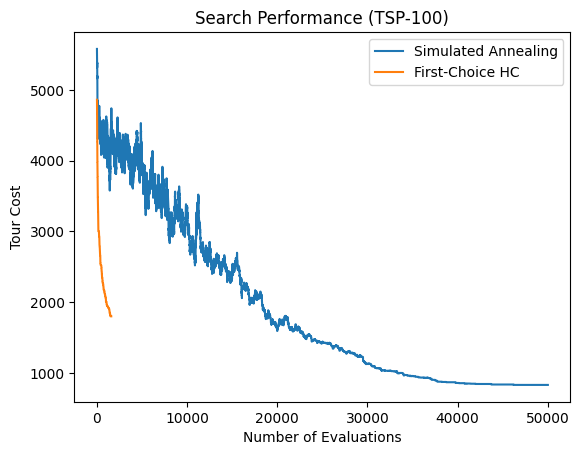

In [33]:
import matplotlib.pyplot as plt

#텍스트 파일로부터 데이터 뽑아오기
f = open("anneal.txt", "r")
data1 = []
for line in f:
    data1.append(float(line.strip()))
f.close()

#텍스트 파일로부터 데이터 뽑아오기
f = open("first.txt", "r")
data2 = []
for line in f:
    data2.append(float(line.strip()))
f.close()

#제목, xlabel, ylabel설정
plt.title("Search Performance (TSP-100)")
plt.xlabel("Number of Evaluations")
plt.ylabel("Tour Cost")
#두개 출력을 위해 x값을 지정해야하므로 데이터 길이만큼 1,2,3... 리스트 만들어서 그래프 출력
a = [i for i in range(1, len(data1)+1)]
b = [i for i in range(1, len(data2)+1)]
plt.plot(a, data1, b, data2)
plt.legend(['Simulated Annealing', 'First-Choice HC'])
plt.show()